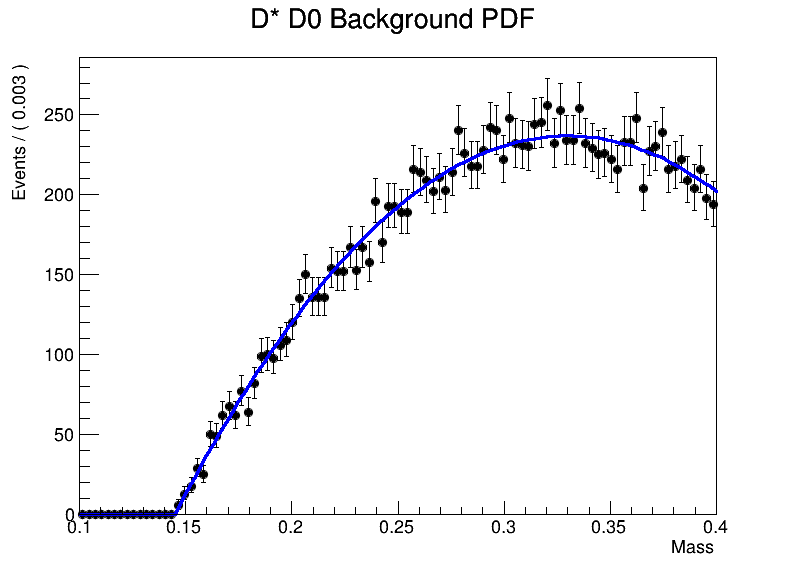

[#1] INFO:NumericIntegration -- RooRealIntegral::init(dst_d0_bg_Int[m]) using numeric integrator RooIntegrator1D to calculate Int(m)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(dst_d0_bg_Int[m]) using numeric integrator RooIntegrator1D to calculate Int(m)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(dst_d0_bg_Int[m]) using numeric integrator RooIntegrator1D to calculate Int(m)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file DstD0BG_Example2.png has been created


In [7]:
import ROOT
from ROOT import RooFit, RooRealVar, RooArgSet, RooDstD0BG
from IPython.display import Image, display

# Define the mass variable m (mass)
m = ROOT.RooRealVar("m", "Mass", 0.1, 0.4)  # Mass range from 1.1 to 0.4 GeV/c^2

# Define the parameters for the background model
dm0 = ROOT.RooRealVar("dm0", "D* mass difference", 0.145, 0.1, 0.2)  # D* mass difference
c = ROOT.RooRealVar("c", "Slope parameter", -1.5, -5, 0)              # Slope parameter
a = ROOT.RooRealVar("a", "First order polynomial coefficient", 0.8, 0, 2)  # Coefficient for polynomial
b = ROOT.RooRealVar("b", "Second order polynomial coefficient", 0.3, 0, 1)  # Coefficient for polynomial

# Create a D* D0 background PDF
dst_d0_bg = RooDstD0BG("dst_d0_bg", "D* D0 Background PDF", m, dm0, c, a, b)

# Generate toy data from the background PDF
data = dst_d0_bg.generate(RooArgSet(m), 15000)  # Generate 15000 events

# Create a frame for plotting
mframe = m.frame(RooFit.Title("D* D0 Background PDF"))

# Plot the generated data
data.plotOn(mframe)

# Plot the background PDF on the same frame
dst_d0_bg.plotOn(mframe)

# Create a canvas to draw the plot
c1 = ROOT.TCanvas("c1", "D* D0 Background PDF", 800, 600)
mframe.Draw()

# Save the plot as an image
c1.SaveAs("DstD0BG_Example2.png")

# Display the image in Jupyter notebook
display(Image(filename="DstD0BG_Example2.png"))
